In [2]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0, Xception, DenseNet121, MobileNetV2, NASNetMobile
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pandas
import numpy as np


train_dir = 'DATASET\TRAIN'
test_dir = 'DATASET\TEST'

In [3]:
# ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Common input size for most pre-trained models
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Models to train
models = {
    'EfficientNetB0': EfficientNetB0,
    'Xception': Xception,
    'DenseNet121': DenseNet121,
    'MobileNetV2': MobileNetV2,
    'NASNetMobile': NASNetMobile
}

# Store results in a list
results = []

Found 22564 images belonging to 3 classes.
Found 2907 images belonging to 3 classes.


In [4]:
# Train each model
for model_name, model_class in models.items():
    print(f"Training {model_name}...")
    
    # Load the pre-trained model without top layers
    base_model = model_class(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # Freeze the base model
    for layer in base_model.layers:
        layer.trainable = False
    
    # Add custom layers on top
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(3, activation='softmax')(x)  # 3 classes: N, O, R
    
    # Create the model
    model = Model(inputs=base_model.input, outputs=predictions)
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(
        train_generator,
        epochs=10,  # Fixed at 20 epochs as per your request
        validation_data=test_generator
    )
    
    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_generator)
    
    # Append the results
    results.append({
        'Model': model_name,
        'Epochs': 10,
        'Train Accuracy': history.history['accuracy'][-1],
        'Val Accuracy': history.history['val_accuracy'][-1],
        'Test Accuracy': test_acc
    })

Training EfficientNetB0...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


c:\Users\Divyanshu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 719ms/step - accuracy: 0.5449 - loss: 0.9781

c:\Users\Divyanshu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


706/706 ━━━━━━━━━━━━━━━━━━━━ 553s 764ms/step - accuracy: 0.5449 - loss: 0.9781 - val_accuracy: 0.4819 - val_loss: 0.9942
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 555s 786ms/step - accuracy: 0.5594 - loss: 0.9511 - val_accuracy: 0.4819 - val_loss: 0.9975
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 547s 774ms/step - accuracy: 0.5565 - loss: 0.9523 - val_accuracy: 0.4819 - val_loss: 0.9947
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 546s 773ms/step - accuracy: 0.5576 - loss: 0.9531 - val_accuracy: 0.4819 - val_loss: 0.9987
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 544s 771ms/step - accuracy: 0.5569 - loss: 0.9525 - val_accuracy: 0.4819 - val_loss: 1.0023
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 545s 772ms/step - accuracy: 0.5581 - loss: 0.9501 - val_accuracy: 0.4819 - val_loss: 1.0025
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 547s 775ms/step - accuracy: 0.5551 - loss: 0.9531 - val_accuracy: 0.4819 - val_loss: 1.0010
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 544s 770ms/step - accuracy: 0.5570 - loss: 0.95

In [6]:
import pandas as pd

In [9]:
df_results = pd.DataFrame(results)
df_results

,Model,Epochs,Train Accuracy,Val Accuracy,Test Accuracy
0,EfficientNetB0,10,0.556861,0.481940,0.481940
1,Xception,10,0.939461,0.736842,0.736842
2,DenseNet121,10,0.943228,0.771242,0.771242
3,MobileNetV2,10,0.948857,0.750946,0.750946
4,NASNetMobile,10,0.927052,0.772274,0.772274


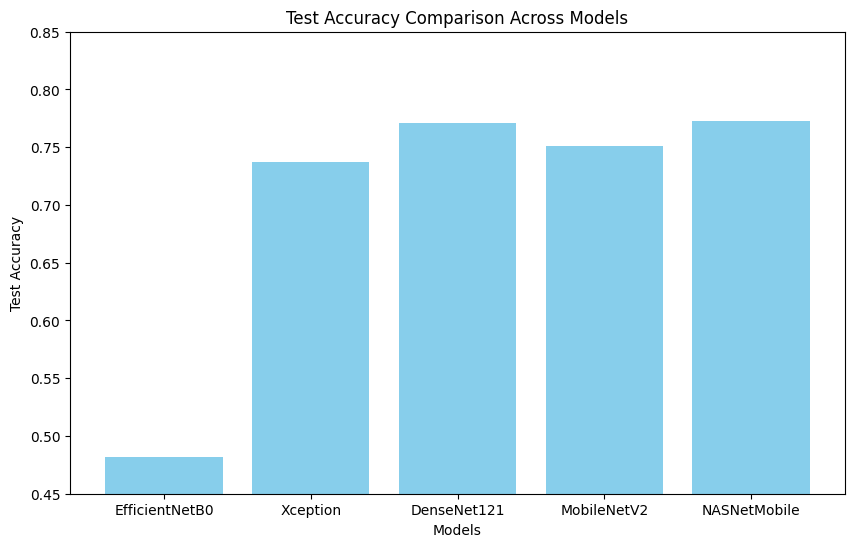

In [10]:
import matplotlib.pyplot as plt
# Bar Plot of Model Test Accuracy
models = ['EfficientNetB0', 'Xception', 'DenseNet121', 'MobileNetV2', 'NASNetMobile']
test_accuracies = [0.481940, 0.736842, 0.771242, 0.750946, 0.772274]

plt.figure(figsize=(10, 6))
plt.bar(models, test_accuracies, color='skyblue')
plt.title('Test Accuracy Comparison Across Models')
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.ylim(0.45, 0.85)
plt.show()

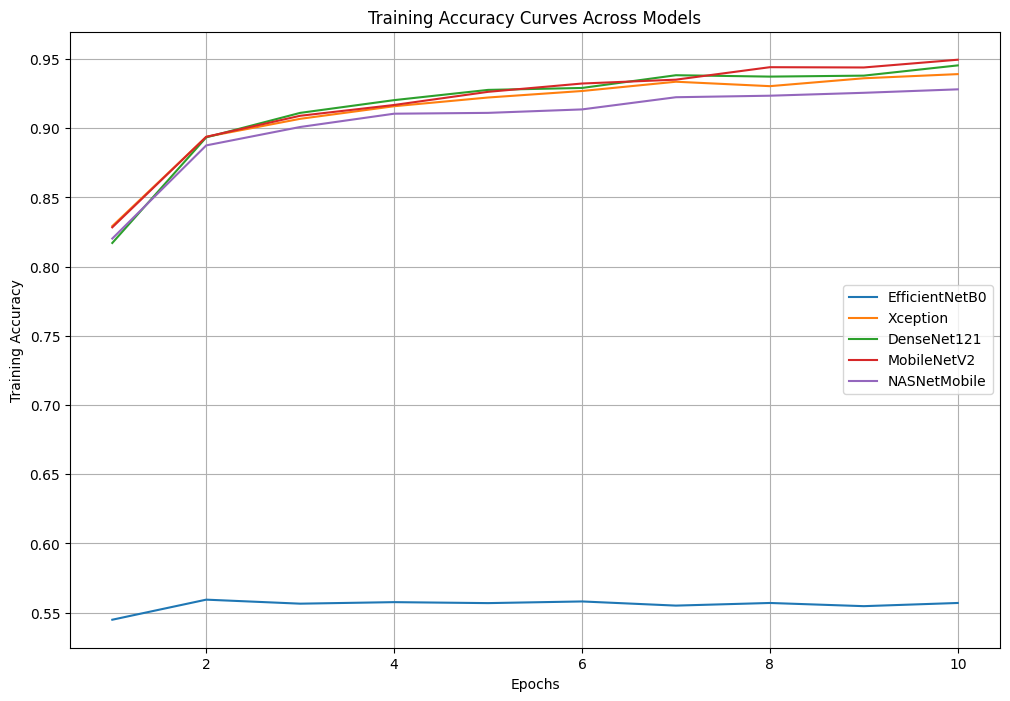

In [11]:
epochs = np.arange(1, 11)
accuracies = {
    'EfficientNetB0': [0.5449, 0.5594, 0.5565, 0.5576, 0.5569, 0.5581, 0.5551, 0.5570, 0.5547, 0.5570],
    'Xception': [0.8293, 0.8938, 0.9068, 0.9159, 0.9222, 0.9269, 0.9336, 0.9304, 0.9361, 0.9391],
    'DenseNet121': [0.8171, 0.8934, 0.9111, 0.9203, 0.9277, 0.9291, 0.9383, 0.9373, 0.9380, 0.9454],
    'MobileNetV2': [0.8284, 0.8938, 0.9090, 0.9168, 0.9263, 0.9323, 0.9351, 0.9441, 0.9439, 0.9495],
    'NASNetMobile': [0.8203, 0.8876, 0.9009, 0.9105, 0.9111, 0.9136, 0.9224, 0.9235, 0.9256, 0.9281]
}

plt.figure(figsize=(12, 8))
for model, acc in accuracies.items():
    plt.plot(epochs, acc, label=model)
plt.title('Training Accuracy Curves Across Models')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.grid(True)
plt.show()